# Beta diversity

## Setup

In [1]:
#Libraries
library("phyloseq")
library("microbiome")
library("IRdisplay")
library("ggforce")
library("vegan")
#Load phyloseq object
load("phyloseq_rarefied.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6.1


Attaching package: ‘vegan’


The following object is masked from ‘package:microbiome’:

    diversity




## Media
### Plot

In [2]:
#Ordinate data
ord.mds.wunifrac <- phyloseq::ordinate(pseq_rarefy, method = "MDS", distance = "wunifrac")

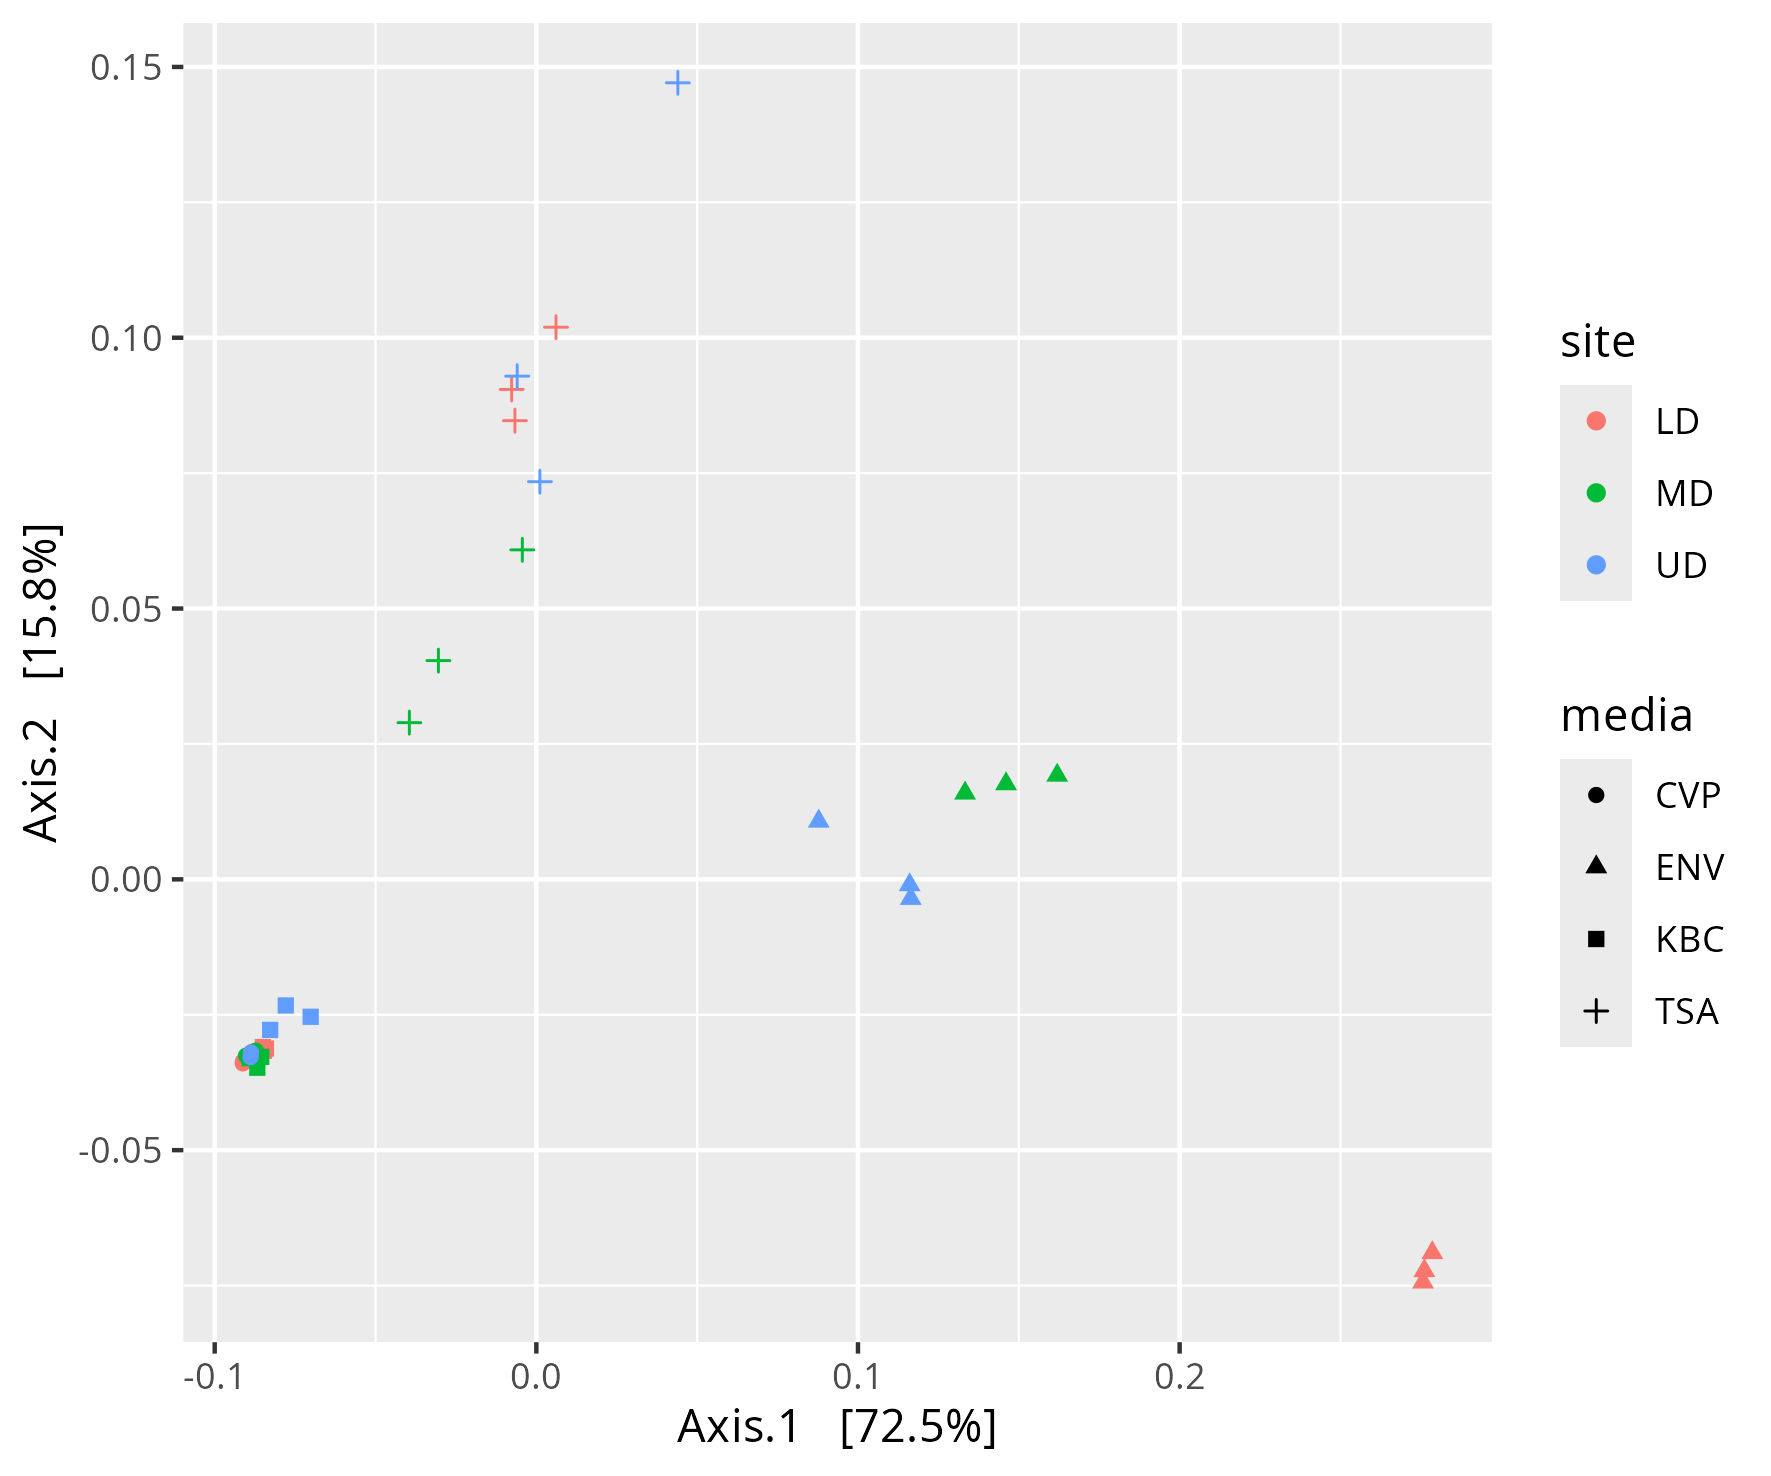

In [3]:
#Plot ordination
nmds.wunifrac <- plot_ordination(pseq_rarefy, ord.mds.wunifrac, 
                color = "site", shape = "media")
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_mds_wunifrac_media_site.png", plot = nmds.wunifrac,
      device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_mds_wunifrac_media_site.png")

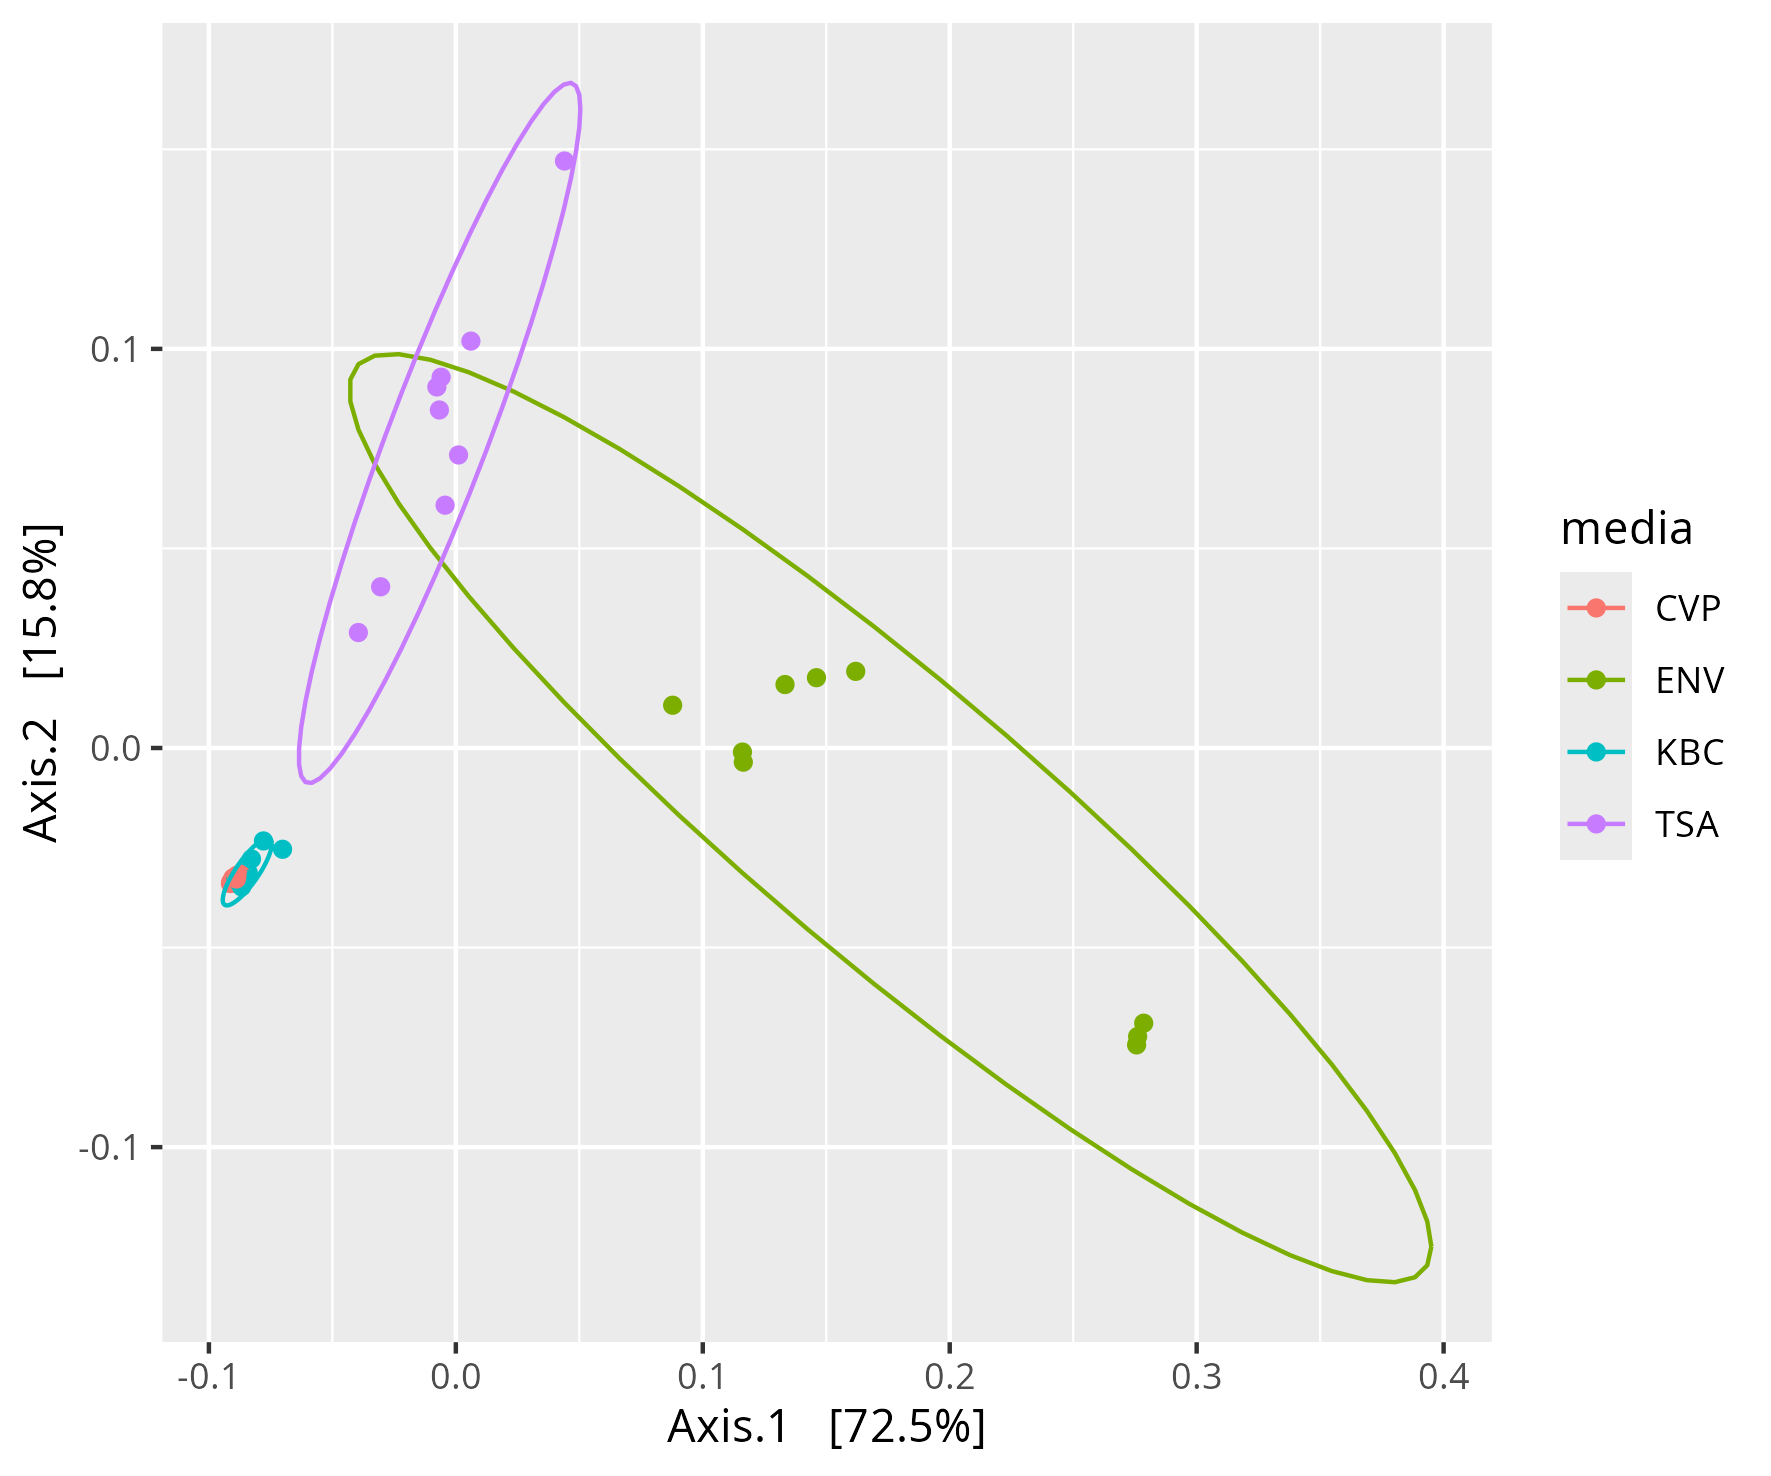

In [4]:
#Plot ordination with ellipse
#Use one metadata category, media, so the stats can be calculated
nmds.wunifrac.media <- phyloseq::plot_ordination(pseq_rarefy, ord.mds.wunifrac, 
                color = "media")
#Add ellipse stats
nmds.wunifrac.media.ellipse <- nmds.wunifrac.media + ggplot2::stat_ellipse()
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_mds_wunifrac_media_ellipse.png", plot = nmds.wunifrac.media.ellipse,
      device = "png", dpi = 300, units = "mm", height = 125, width = 150)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_mds_wunifrac_media_ellipse.png")

### PERMANOVA

In [5]:
#PERMANOVA
#Produce distance matrix
#as.matrix required for the future PERMANOVA tests
wunifrac_dist_mat <- as.matrix(phyloseq::distance(pseq_rarefy, method="wunifrac"))
#Extract metadata data frame from phyloseq
metadf <- data.frame(phyloseq::sample_data(pseq_rarefy)) 
#PERMANOVA/ADONIS of media and site
wunifrac_adonis <- vegan::adonis2(wunifrac_dist_mat ~ media+site, data = metadf, by = "margin")
wunifrac_adonis

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
media,3,0.50519485,0.7827332,45.854027,0.001
site,2,0.03005462,0.0465657,4.091863,0.004
Residual,30,0.11017459,0.1707011,NA,NA
Total,35,0.64542406,1.0000000,NA,NA


In [6]:
#Pairwise comparison
#Get combination of unique media values
cbn <- combn(x = unique(metadf$media), m = 2)
cbn
#The first combination
cbn[,1]
#Subset phyloseq and extract metadata
pseq_rarefy_subset <- phyloseq::subset_samples(pseq_rarefy, media %in% cbn[,1])
#Metadata data frame
metadf_subset <- data.frame(phyloseq::sample_data(pseq_rarefy_subset))
metadf_subset
#Extract sample names
samples_subset <- row.names(metadf_subset)
samples_subset

#Subset distance matrix so it only contains rows and column combinations of the
#CVP and ENV samples (1st combination)
wunifrac_dist_mat_subset <- wunifrac_dist_mat[samples_subset,samples_subset]
#Carry out permanova/adonis with the subset data
#This is 1 of the pairwise PERMANOVA tests
wunifrac_pairwise_adonis <- vegan::adonis2(
    wunifrac_dist_mat_subset ~ media, data = metadf_subset, by = "margin")
wunifrac_pairwise_adonis

[,1] [,2] [,3] [,4] [,5] [,6]
[1,] CVP  CVP  CVP  ENV  ENV  KBC 
[2,] ENV  KBC  TSA  KBC  TSA  TSA 
Levels: CVP ENV KBC TSA

[1] CVP ENV
Levels: CVP ENV KBC TSA

,sample.name,site,media,replicate,site.media
,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_ENV_rep1,LD_ENV_rep1,LD,ENV,rep1,LD_ENV
LD_ENV_rep2,LD_ENV_rep2,LD,ENV,rep2,LD_ENV
LD_ENV_rep3,LD_ENV_rep3,LD,ENV,rep3,LD_ENV
MD_CVP_rep1,MD_CVP_rep1,MD,CVP,rep1,MD_CVP
MD_CVP_rep2,MD_CVP_rep2,MD,CVP,rep2,MD_CVP
MD_CVP_rep3,MD_CVP_rep3,MD,CVP,rep3,MD_CVP


[1] "LD_CVP_rep1" "LD_CVP_rep2" "LD_CVP_rep3" "LD_ENV_rep1" "LD_ENV_rep2"
 [6] "LD_ENV_rep3" "MD_CVP_rep1" "MD_CVP_rep2" "MD_CVP_rep3" "MD_ENV_rep1"
[11] "MD_ENV_rep2" "MD_ENV_rep3" "UD_CVP_rep1" "UD_CVP_rep2" "UD_CVP_rep3"
[16] "UD_ENV_rep1" "UD_ENV_rep2" "UD_ENV_rep3"

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
media,1,0.3221832,0.7295964,43.17082,0.001
Residual,16,0.1194078,0.2704036,NA,NA
Total,17,0.4415910,1.0000000,NA,NA


In [7]:
#Pairwise comparison loop
#Get combinations of unique media values
cbn <- combn(x = unique(metadf$media), m = 2)
#Create empty data frame with 4 columns 
# and a number of rows equal to the number of combinations
pairwise_permanova_df <- as.data.frame(matrix(data = NA, nrow = ncol(cbn), ncol = 4))
#Add column names
colnames(pairwise_permanova_df)  <- c("1","2","p","p.adj")

#Loop through combinations
for(i in 1:ncol(cbn)){
    #Subset phyloseq and extract metadata
    #Ensure to change metadata group if using different grouping (media)
    pseq_rarefy_subset <- phyloseq::subset_samples(pseq_rarefy, media %in% cbn[,i])
    #Metadata data frame
    metadf_subset <- data.frame(phyloseq::sample_data(pseq_rarefy_subset))
    #Extract sample names
    samples_subset <- row.names(metadf_subset)
    #Subset distance matrix
    wunifrac_dist_mat_subset <- wunifrac_dist_mat[samples_subset,samples_subset]
    #PERMANOVA/adonis of media
    #Ensure to change group name if using different group (media)
    pairwise_adonis <- vegan::adonis2(
        wunifrac_dist_mat_subset ~ media, data = metadf_subset, by = "margin")
    #Add the group names and p-value to the main data frame
    pairwise_permanova_df[i,1:2] <- cbn[,i]
    pairwise_permanova_df[i,3] <- pairwise_adonis[1,"Pr(>F)"]
}
#View data frame
pairwise_permanova_df
#Add adjusted P-values
pairwise_permanova_df$p.adj <- p.adjust(pairwise_permanova_df$p, method = "BH")
#View data frame
pairwise_permanova_df
#Write to file
write.table(x = pairwise_permanova_df, file = "pairwise_permanova_media_wunifrac.tsv", 
            quote = FALSE, row.names =FALSE)

1,2,p,p.adj
<chr>,<chr>,<dbl>,<lgl>
CVP,ENV,0.001,NA
CVP,KBC,0.001,NA
CVP,TSA,0.001,NA
ENV,KBC,0.001,NA
ENV,TSA,0.001,NA
KBC,TSA,0.001,NA


1,2,p,p.adj
<chr>,<chr>,<dbl>,<dbl>
CVP,ENV,0.001,0.001
CVP,KBC,0.001,0.001
CVP,TSA,0.001,0.001
ENV,KBC,0.001,0.001
ENV,TSA,0.001,0.001
KBC,TSA,0.001,0.001


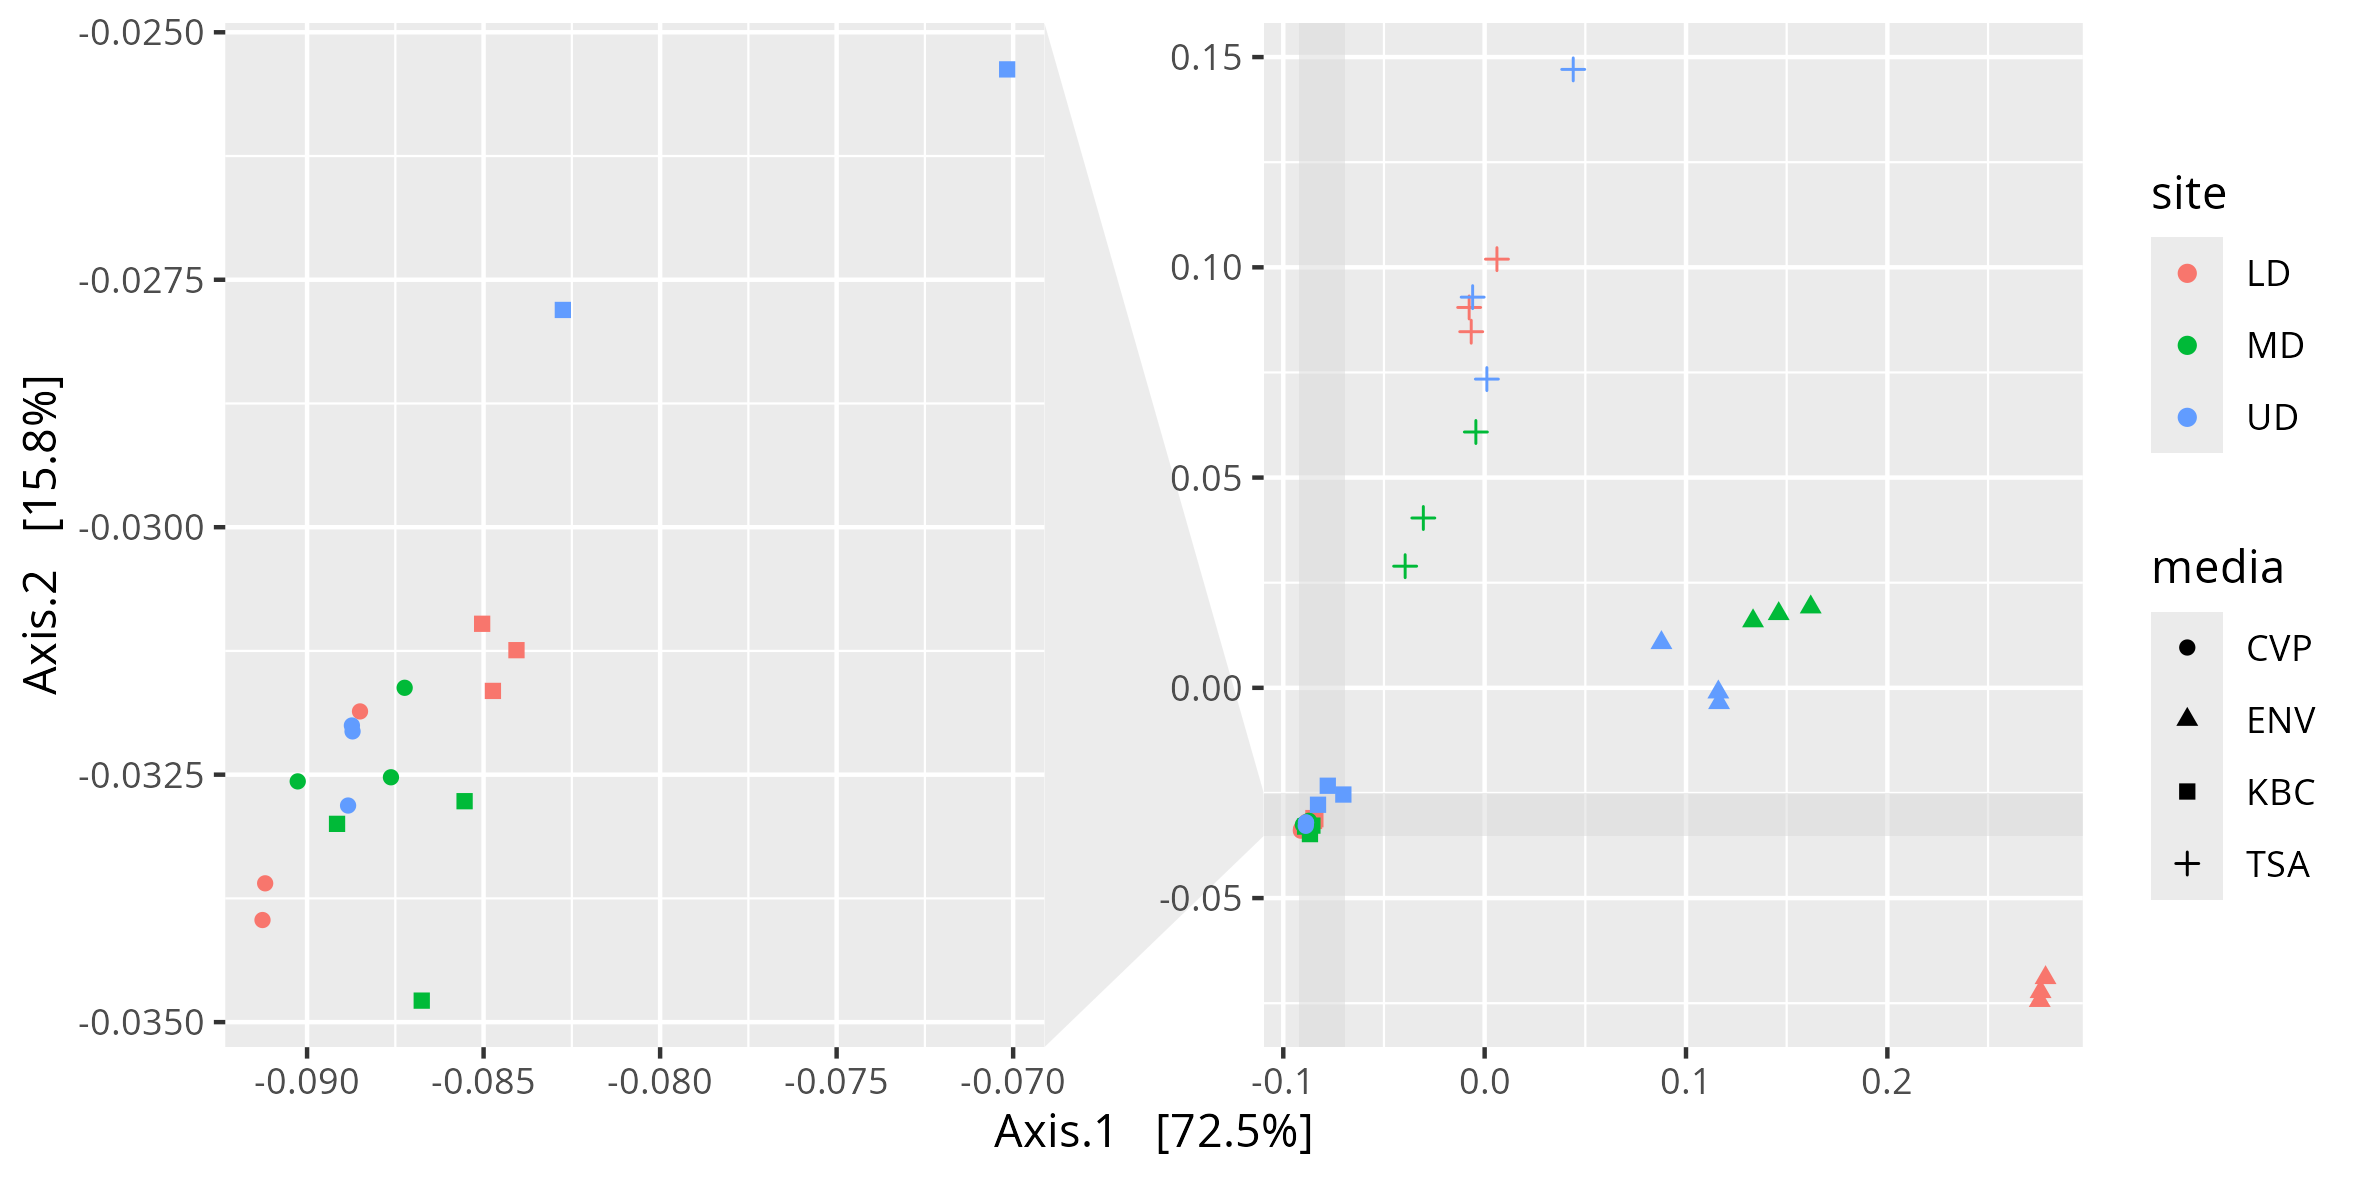

In [8]:
#Zoomed plot
#Ordinate data
ord.mds.wunifrac <- phyloseq::ordinate(pseq_rarefy, method = "MDS", distance = "wunifrac")
#Plot ordination
nmds.wunifrac <- plot_ordination(pseq_rarefy, ord.mds.wunifrac, 
                color = "site", shape = "media") +
                #Zoom into CVP and KBC samples specified by the metadata category
                #Zoom.size = 1 so the zoom section is the same size as the main plot
                #Zoom.size = 2 would mean the zoom plot is 2 times the size of the original
                ggforce::facet_zoom(xy = media == c("CVP","KBC"), zoom.size=1)
#Save with ggsave
ggsave(filename = "./Beta_diversity_mds_wunifrac_media_site_zoom.png", plot = nmds.wunifrac,
      device = "png", dpi = 300, units = "mm", height = 100, width = 200)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_mds_wunifrac_media_site_zoom.png")

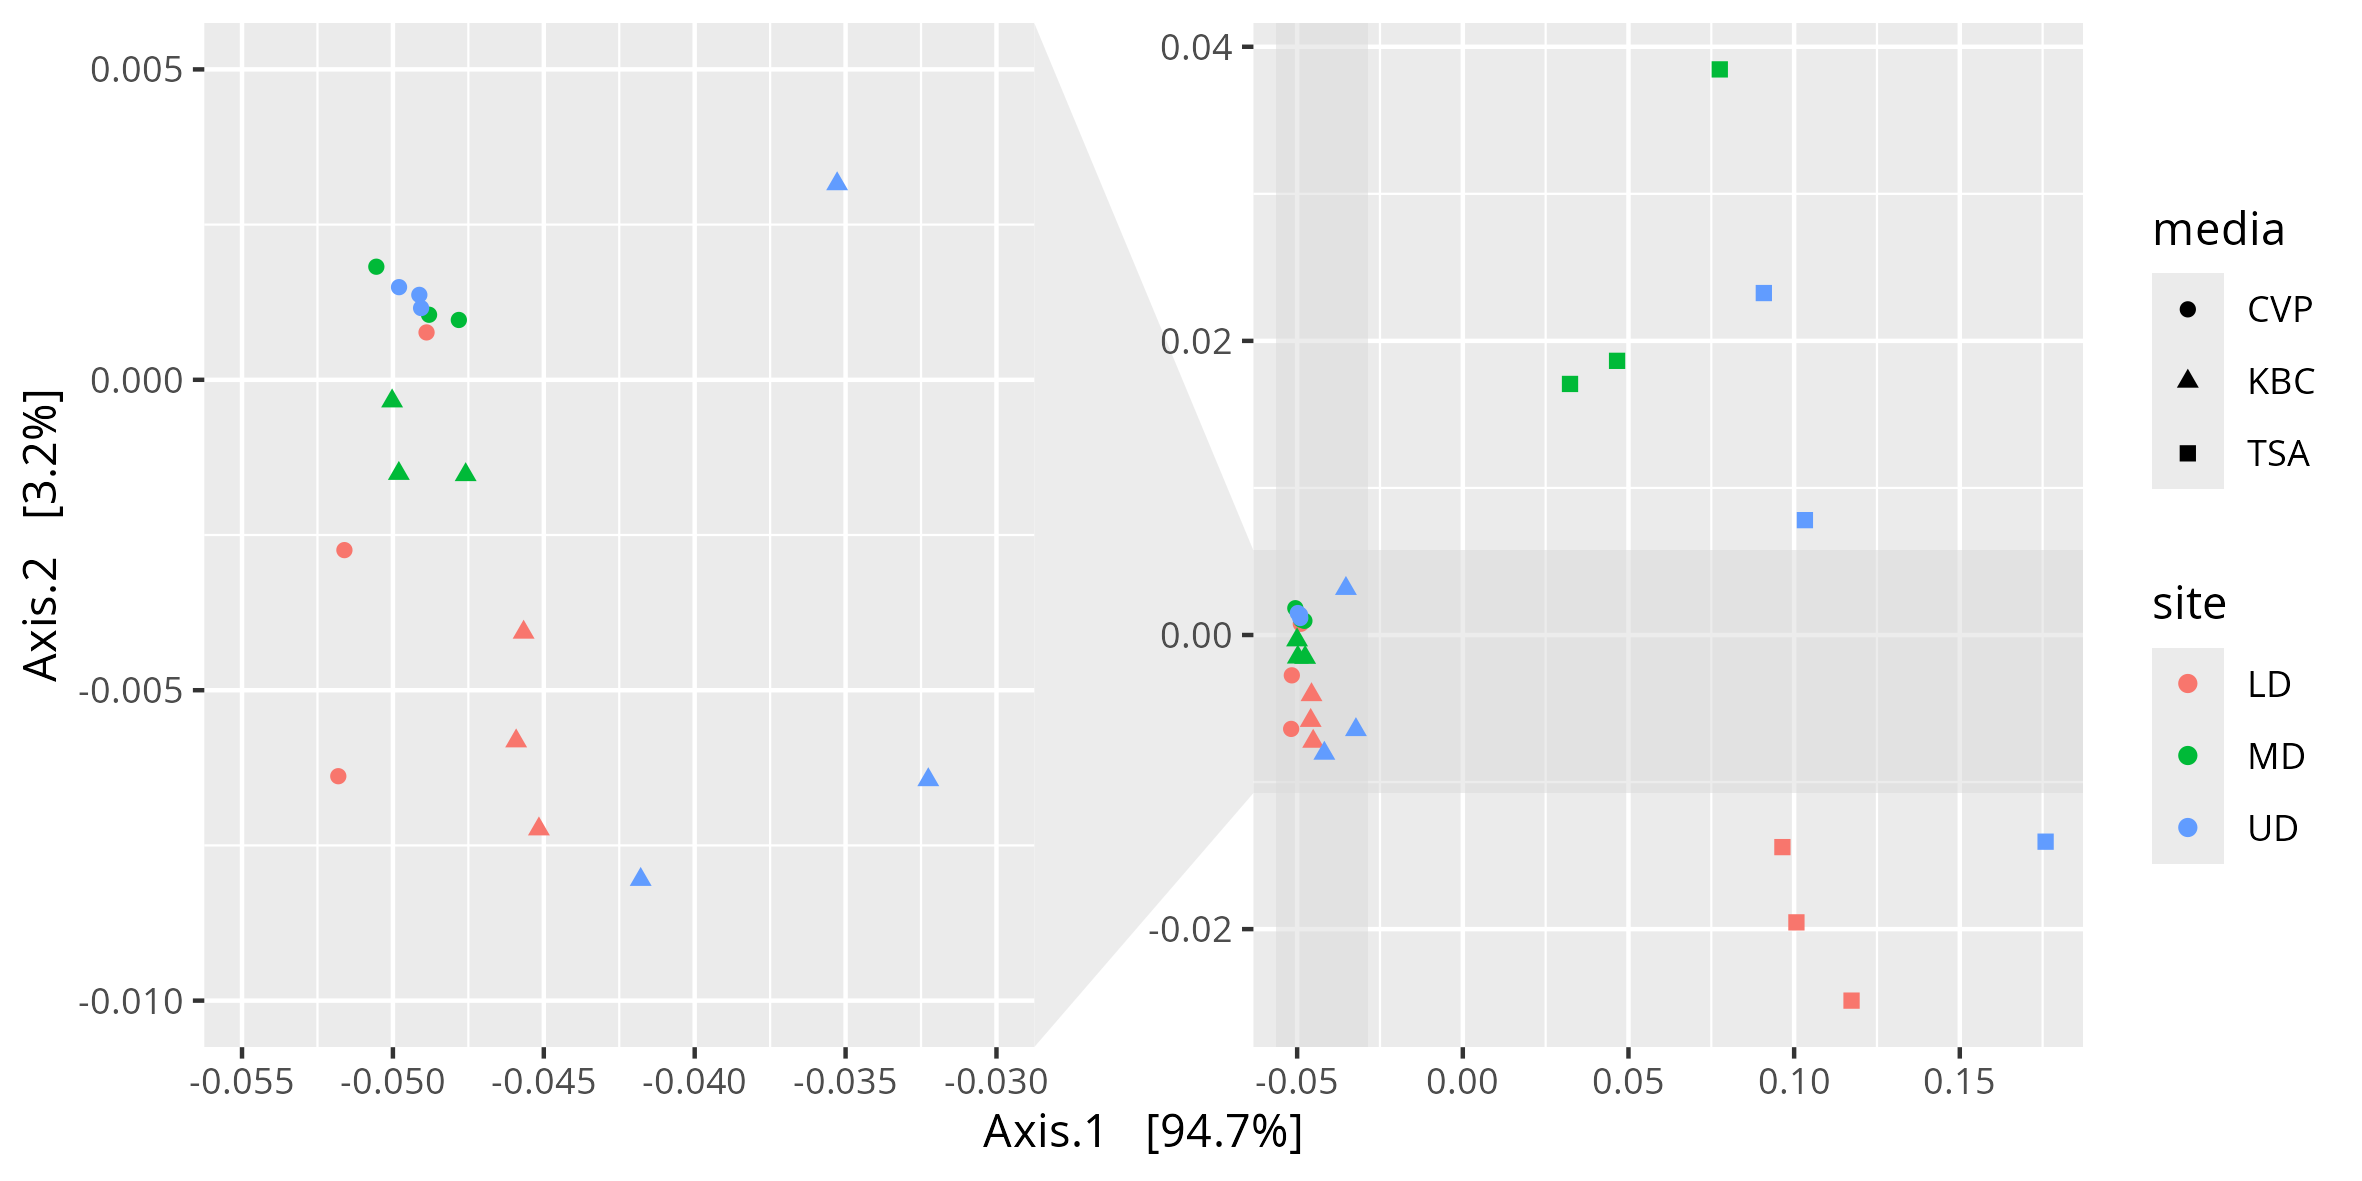

In [9]:
#No env
#Subset phyloseq to remove ENV samples
pseq_rarefy_no_env <- phyloseq::subset_samples(pseq_rarefy, media %in% c("CVP","KBC","TSA"))
#Ordinate data
ord.mds.wunifrac <- phyloseq::ordinate(pseq_rarefy_no_env, method = "MDS", distance = "wunifrac")
#Plot ordination
nmds.wunifrac <- plot_ordination(pseq_rarefy_no_env, ord.mds.wunifrac, 
                color = "site", shape = "media") +
                #Choose a ranges for the x axis and y axis to zoom into
                #These were chosen after viewing the plot without the zoom
                ggforce::facet_zoom(xlim = c(-0.055,-0.03), ylim = c(-0.01,0.005), zoom.size=1)
#Save ggplot2 object with ggsave
ggsave(filename = "./Beta_diversity_mds_wunifrac_media_site_no_env.png", plot = nmds.wunifrac,
      device = "png", dpi = 300, units = "mm", height = 100, width = 200)
#Display plot
IRdisplay::display_png(file = "./Beta_diversity_mds_wunifrac_media_site_no_env.png")

### Site Permanova

In [10]:
#Pairwise comparison loop for sites
#Get combination of unique media values
cbn <- combn(x = unique(metadf$site), m = 2)
#Create empty data frame with 4 columns 
# and a number of rows equal to the number of combinations
pairwise_permanova_df <- as.data.frame(matrix(data = NA, nrow = ncol(cbn), ncol = 4))
#Add column names
colnames(pairwise_permanova_df)  <- c("1","2","p","p.adj")

#Loop through combinations
for(i in 1:ncol(cbn)){
    #Subset phyloseq and extract metadata
    #Ensure to change metadata group if using different grouping (site & media)
    pseq_rarefy_subset <- phyloseq::subset_samples(pseq_rarefy, site %in% cbn[,i])
    #Metadata data frame
    metadf_subset <- data.frame(phyloseq::sample_data(pseq_rarefy_subset))
    #Extract sample names
    samples_subset <- row.names(metadf_subset)
    #Subset distance matrix
    wunifrac_dist_mat_subset <- wunifrac_dist_mat[samples_subset,samples_subset]
    #PERMANOVA/adonis of site
    #Ensure to change group name if using different group (site)
    pairwise_adonis <- vegan::adonis2(
        wunifrac_dist_mat_subset ~ site, data = metadf_subset, by = "margin")
    #Add the group names and p-value to the main data frame
    pairwise_permanova_df[i,1:2] <- cbn[,i]
    pairwise_permanova_df[i,3] <- pairwise_adonis[1,"Pr(>F)"]
}
#Add adjusted P-values
pairwise_permanova_df$p.adj <- p.adjust(pairwise_permanova_df$p, method = "BH")
#Write to file
write.table(x = pairwise_permanova_df, file = "pairwise_permanova_site_wunifrac.tsv", 
            quote = FALSE, row.names =FALSE)
#View data frame
pairwise_permanova_df

1,2,p,p.adj
<chr>,<chr>,<dbl>,<dbl>
LD,MD,0.304,0.5475
LD,UD,0.365,0.5475
MD,UD,0.734,0.7340


### Site and media PERMANOVA

In [11]:
#Pairwise comparison loop for sites & media
#Get combination of unique sites & media values
cbn <- combn(x = unique(metadf$site.media), m = 2)
#Create empty data frame with 4 columns 
# and a number of rows equal to the number of combinations
pairwise_permanova_df <- as.data.frame(matrix(data = NA, nrow = ncol(cbn), ncol = 4))
#Add column names
colnames(pairwise_permanova_df)  <- c("1","2","p","p.adj")

#Loop through combinations
for(i in 1:ncol(cbn)){  
    #Subset phyloseq and extract metadata
    #Ensure to change metadata group if using different grouping (site & media)
    pseq_rarefy_subset <- phyloseq::subset_samples(pseq_rarefy, site.media %in% cbn[,i])
    #Metadata data frame
    metadf_subset <- data.frame(phyloseq::sample_data(pseq_rarefy_subset))
    #Extract sample names
    samples_subset <- row.names(metadf_subset)
    #Subset distance matrix
    wunifrac_dist_mat_subset <- wunifrac_dist_mat[samples_subset,samples_subset]
    #PERMANOVA/adonis of site
    #Ensure to change group name if using different group (sites & media)
    pairwise_adonis <- vegan::adonis2(
        wunifrac_dist_mat_subset ~ site.media, data = metadf_subset, by = "margin")
    #Add the group names and p-value to the main data frame
    pairwise_permanova_df[i,1:2] <- cbn[,i]
    pairwise_permanova_df[i,3] <- pairwise_adonis[1,"Pr(>F)"]
}
#Add adjusted P-values
pairwise_permanova_df$p.adj <- p.adjust(pairwise_permanova_df$p, method = "BH")
#Write to file
write.table(x = pairwise_permanova_df, file = "pairwise_permanova_site_media_wunifrac.tsv", 
            quote = FALSE, row.names =FALSE)
#View data frame
pairwise_permanova_df

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permut

1,2,p,p.adj
<chr>,<chr>,<dbl>,<dbl>
LD_CVP,LD_ENV,0.1,0.1015385
LD_CVP,LD_KBC,0.1,0.1015385
LD_CVP,LD_TSA,0.1,0.1015385
LD_CVP,MD_CVP,0.1,0.1015385
LD_CVP,MD_ENV,0.1,0.1015385
LD_CVP,MD_KBC,0.1,0.1015385
LD_CVP,MD_TSA,0.1,0.1015385
LD_CVP,UD_CVP,0.1,0.1015385
LD_CVP,UD_ENV,0.1,0.1015385


In [12]:
phyloseq::distanceMethodList

$UniFrac
[1] "unifrac"  "wunifrac"

$DPCoA
[1] "dpcoa"

$JSD
[1] "jsd"

$vegdist
 [1] "manhattan"  "euclidean"  "canberra"   "bray"       "kulczynski"
 [6] "jaccard"    "gower"      "altGower"   "morisita"   "horn"      
[11] "mountford"  "raup"       "binomial"   "chao"       "cao"       

$betadiver
 [1] "w"   "-1"  "c"   "wb"  "r"   "I"   "e"   "t"   "me"  "j"   "sor" "m"  
[13] "-2"  "co"  "cc"  "g"   "-3"  "l"   "19"  "hk"  "rlb" "sim" "gl"  "z"  

$dist
[1] "maximum"   "binary"    "minkowski"

$designdist
[1] "ANY"